In [1]:
from tools import *
import numpy as np

In [2]:
PATH_TO_LVK_DATA = '/Users/ulyana/Documents/GSSI/PhD Projects/GWTC_analysis/GWTC_LVK_data/'
PATH_TO_RESULTS = '/Users/ulyana/Documents/GSSI/PhD Projects/GWTC_analysis/'
PATH_TO_YAML = '/Users/ulyana/Documents/GSSI/PhD Projects/GWTC_analysis/yaml/'
PATH_TO_PSD = '/Users/ulyana/Documents/GSSI/PhD Projects/GWTC_analysis/gwtc_psds/'

In [3]:
waveform = 'IMRPhenomXPHM'

## Select events and create injections for GWFish

In [ ]:
estimator = 'maxP' # or 'median
params = ['chirp_mass', 'mass_ratio', 'mass_1', 'mass_2', 'luminosity_distance', 'dec', 'ra', 'theta_jn', 'psi', 'phase', 
            'geocent_time', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'redshift']

In [ ]:
create_injections_from_gwtc(PATH_TO_LVK_DATA, PATH_TO_RESULTS, waveform, params, estimator)

In [ ]:
# Intersect the injectiosn with median and maxP
median_list = np.loadtxt(PATH_TO_RESULTS + 'info/event_list_%s_%s.txt' %(waveform, 'median'), dtype=str)
maxP_list = np.loadtxt(PATH_TO_RESULTS + 'info/event_list_%s_%s.txt' %(waveform, 'maxP'), dtype=str)
median_maxP_intersection_list = list(set(maxP_list).intersection(median_list))
np.savetxt(PATH_TO_RESULTS + 'info/event_list_intersection_%s_%s.txt' %(waveform, 'median_maxP'), median_maxP_intersection_list, fmt='%s')


In [ ]:
# Select events that have an analytical prior
events_maxP_median = np.loadtxt(PATH_TO_RESULTS + 'info/event_list_intersection_%s_median_maxP.txt' %(waveform), dtype=str)
check_and_store_priors(PATH_TO_LVK_DATA, PATH_TO_RESULTS, events_maxP_median, waveform)

## List of rejected events

### Events rejected because not BBH 

Therefore, they are not analyzed using the waveform approximant IMRPhenomXPHM

In [ ]:
no_imrphenomxphm = np.loadtxt(PATH_TO_RESULTS + 'info/waveform_not_in_list_IMRPhenomXPHM.txt', dtype=str)
print(no_imrphenomxphm)

### Events rejected because do no have a maxP estimate

In [ ]:
no_maxP = np.loadtxt(PATH_TO_RESULTS + 'info/maxP_not_in_list_for_%s.txt' %waveform, dtype=str)
print(no_maxP)

### Events rejected because they do not provide an analytic prior

In [ ]:
no_prior = np.loadtxt(PATH_TO_RESULTS + 'info/events_with_no_priors_%s.txt' %waveform, dtype=str)
print(no_prior)

## Create .yaml files and store detectors information

In [ ]:
events = np.loadtxt(PATH_TO_RESULTS + 'info/' + 'events_with_priors_%s.txt' %waveform, dtype=str)

In [ ]:
detectors_and_yaml_files(PATH_TO_LVK_DATA, PATH_TO_RESULTS, PATH_TO_YAML, PATH_TO_PSD, events, waveform)

## Fisher Analysis

In [4]:
events = np.loadtxt(PATH_TO_RESULTS + 'info/' + 'events_with_priors_%s.txt' %waveform, dtype=str)
with open(PATH_TO_RESULTS + 'info/' + 'detectors_dictionary.pkl', 'rb') as f:
    detectors = pickle.load(f)

In [ ]:
estimator = 'maxP'
#fisher_parameters = ['chirp_mass', 'mass_ratio', 'luminosity_distance', 'dec', 'ra', 'theta_jn', 'psi', 'phase', 
#            'geocent_time', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl']
fisher_parameters = ['chirp_mass', 'mass_ratio', 'luminosity_distance', 'dec', 'ra', 'theta_jn', 'psi', 'phase', 
            'geocent_time', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl']
gwfish_analysis(PATH_TO_YAML, PATH_TO_RESULTS + '/injections/', events, waveform, estimator,
                    detectors, fisher_parameters, PATH_TO_RESULTS + '/results/gwfish_mChirp_q/')

## Rotate Fisher matrix from m1-m2 to mChirp and q

In [4]:
estimator = 'median'
events = np.loadtxt(PATH_TO_RESULTS + 'info/' + 'events_with_priors_%s.txt' %waveform, dtype=str)
with open(PATH_TO_RESULTS + 'info/' + 'detectors_dictionary.pkl', 'rb') as f:
    detectors = pickle.load(f)

In [5]:
lbs_errs = ['snr', 'chirp_mass', 'mass_ratio', 'mass_1', 'mass_2', 'luminosity_distance', 'dec', 'ra', 'theta_jn',
        'psi', 'phase', 'geocent_time', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'redshift', 
        'mass1_lvk', 'mass2_lvk', 'err_mass_1', 'err_mass_2', 'err_luminosity_distance', 'err_dec', 'err_ra',
        'err_theta_jn', 'err_psi', 'err_phase', 'err_geocent_time', 'err_a_1', 'err_a_2', 'err_tilt_1',
        'err_tilt_2', 'err_phi_12', 'err_phi_jl', 'err_sky_location']

In [6]:
new_fisher_parameters = ['chirp_mass', 'mass_ratio', 'luminosity_distance', 'dec', 'ra', 'theta_jn', 'psi', 'phase',
            'geocent_time', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl']

In [7]:
get_rotated_fisher_matrix(PATH_TO_RESULTS, events, detectors, estimator, lbs_errs, new_fisher_parameters)

# Test

In [8]:
estimator = 'median'
events = np.loadtxt(PATH_TO_RESULTS + 'info/' + 'events_with_priors_%s.txt' %waveform, dtype=str)
with open(PATH_TO_RESULTS + 'info/' + 'detectors_dictionary.pkl', 'rb') as f:
    detectors = pickle.load(f)

In [18]:
nev = len(events)
fishers_chirp = np.zeros((nev, 15, 15))
rotated_fishers = np.zeros((nev, 15, 15))
mchirp_entry_rot_ov = np.zeros(nev)
q_entry_rot_ov = np.zeros(nev)
for i in range(nev):
    label = get_label(detectors, events[i], estimator, 'fishers')
    
    fishers_chirp[i, :, :] = np.load(PATH_TO_RESULTS + 'results/gwfish_mChirp_q/' + label)
    rotated_fishers[i, :, :] = np.load(PATH_TO_RESULTS + 'results/gwfish_rotated/' + label)
    mchirp_entry_rot_ov[i] = rotated_fishers[i, 0, 0] / fishers_chirp[i, 0, 0]
    q_entry_rot_ov[i] = rotated_fishers[i, 1, 1] / fishers_chirp[i, 1, 1]

In [19]:
import matplotlib.pyplot as plt

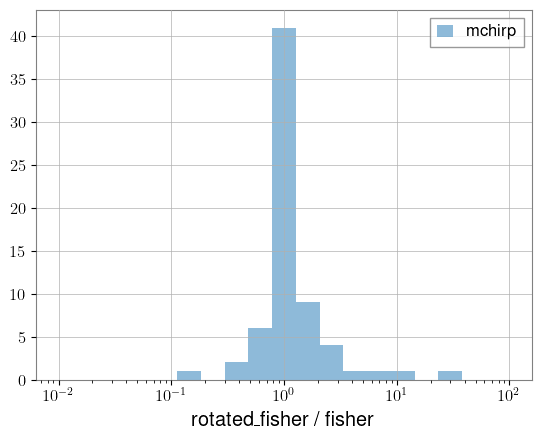

In [47]:
plt.hist(mchirp_entry_rot_ov, bins=np.logspace(-2, 2, 20), alpha=0.5, label='mchirp')
#plt.hist(q_entry_rot_ov, bins=np.logspace(-2, 2, 20), alpha=0.5, label='q')
plt.legend(loc='upper right')
plt.xscale('log')
plt.xlabel('rotated_fisher / fisher')
plt.show()

In [30]:
import pandas as pd

In [39]:
mass_ratio = []
lbs_errs = ['snr', 'chirp_mass', 'mass_ratio', 'mass_1', 'mass_2', 'luminosity_distance', 'dec', 'ra', 'theta_jn',
        'psi', 'phase', 'geocent_time', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'redshift', 
        'mass1_lvk', 'mass2_lvk', 'err_mass_1', 'err_mass_2', 'err_luminosity_distance', 'err_dec', 'err_ra',
        'err_theta_jn', 'err_psi', 'err_phase', 'err_geocent_time', 'err_a_1', 'err_a_2', 'err_tilt_1',
        'err_tilt_2', 'err_phi_12', 'err_phi_jl', 'err_sky_location']
for event in events:
    label = get_label(detectors, event, estimator, 'errors')
    data = pd.read_csv(PATH_TO_RESULTS + 'results/gwfish_mChirp_q/' + label, names = lbs_errs, delimiter=' ', skiprows=1)
    mass_ratio.append(data['mass_ratio'].iloc[0])

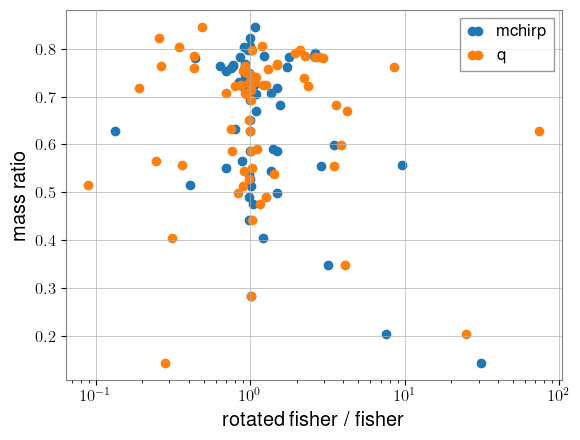

In [46]:
plt.semilogx(mchirp_entry_rot_ov, mass_ratio, 'o', label = 'mchirp')
plt.semilogx(q_entry_rot_ov, mass_ratio, 'o', label = 'q')
plt.legend()
plt.xlabel('rotated fisher / fisher')
plt.ylabel('mass ratio')
plt.show()

In [26]:
k = 40

In [27]:
my_fisher = fishers_chirp[k, 0, 0]
my_rotated_fisher = rotated_fishers[k, 0, 0]
print(my_fisher)
print(my_rotated_fisher)

0.20801119211788816
2.0040657326634754


In [28]:
my_fisher = fishers_chirp[k, 1, 1]
my_rotated_fisher = rotated_fishers[k, 1, 1]
print(my_fisher)
print(my_rotated_fisher)

693.2771035935725
249.5362388253236


## Apply priors